## simple linear regression on stock data

* sample stock : rhfl
* tutorial followed : cs229a concept + https://www.youtube.com/watch?v=feDJkDaNuOk implementation

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn import linear_model
import requests as req

#testing
from sklearn.model_selection import train_test_split

In [35]:
# url = "https://groww.in/v1/api/charting_service/v2/chart/exchange/BSE/segment/CASH/517166/monthly?intervalInMinutes=30&minimal=true"
rhfl_url = "https://groww.in/v1/api/charting_service/v2/chart/exchange/NSE/segment/CASH/RHFL/monthly?intervalInMinutes=120"
response = req.get(rhfl_url)
data = response.json()
# print(data)
# print(data['candles'][0])
# print(len(data['candles']))
c = 0
# for i in data['candles']:
    # #todo decode what is in candles[0]
    # i[0] = c
    # c += 1
    # # i[3] = data['candles'][i+1] - i
data = pd.DataFrame(data['candles'], columns=['time', 'open', 'high', 'low', 'close', 'volume'])
data #8mar-6apr data of rhfl

,time,open,high,low,close,volume
0,1678247100,2.95,2.95,2.85,2.85,296863
1,1678254300,2.90,2.90,2.85,2.90,412996
2,1678261500,2.85,2.95,2.85,2.90,957365
3,1678268700,2.95,2.95,2.90,2.95,989967
4,1678333500,2.95,2.95,2.85,2.85,345961
...,...,...,...,...,...,...
73,1680673500,3.00,3.00,3.00,3.00,403622
74,1680680700,3.00,3.00,3.00,3.00,437257
75,1680688440,3.00,3.00,3.00,3.00,438999
76,1680752700,3.30,3.30,3.30,3.30,511433


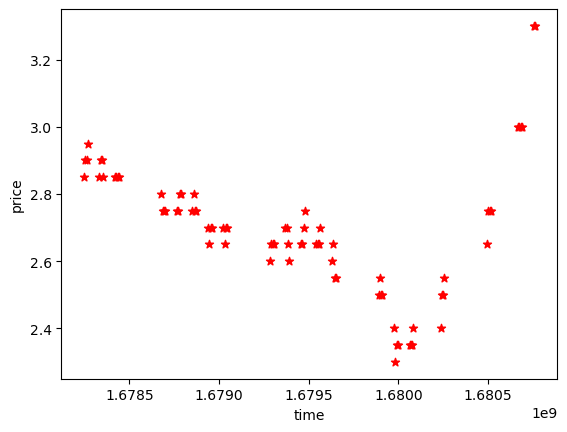

In [36]:
x = data['time']
y = data['close']
z = data['volume']
plt.scatter(x, y, color='red', marker='*')
# plt.scatter(x, z, color='blue')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=23) #40% test data && random state is see
print(X_train)

70    1680508020
63    1680083160
0     1678247100
14    1678693500
30    1679039220
74    1680680700
38    1679384760
62    1680075960
13    1678686300
32    1679283900
35    1679305500
10    1678434300
2     1678261500
72    1680666300
58    1679989500
55    1679910300
22    1678866300
75    1680688440
43    1679478480
52    1679888700
1     1678254300
36    1679370300
60    1680061500
76    1680752700
33    1679291100
19    1678787460
57    1679982300
26    1678952760
15    1678700760
41    1679464080
48    1679629500
21    1678859100
68    1680493500
64    1680234300
66    1680248700
49    1679636700
12    1678679100
45    1679550360
6     1678347900
51    1679651100
25    1678945500
39    1679391960
31    1679046420
54    1679903100
73    1680673500
40    1679456700
Name: time, dtype: int64


In [54]:
y_train

70    2.75
63    2.40
0     2.85
14    2.75
30    2.70
74    3.00
38    2.65
62    2.35
13    2.75
32    2.60
35    2.65
10    2.85
2     2.90
72    3.00
58    2.35
55    2.50
22    2.75
75    3.00
43    2.75
52    2.50
1     2.90
36    2.70
60    2.35
76    3.30
33    2.65
19    2.80
57    2.30
26    2.70
15    2.75
41    2.65
48    2.60
21    2.80
68    2.65
64    2.40
66    2.50
49    2.65
12    2.80
45    2.65
6     2.90
51    2.55
25    2.65
39    2.60
31    2.70
54    2.50
73    3.00
40    2.65
Name: close, dtype: float64

In [38]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train)

[[1680508020]
 [1680083160]
 [1678247100]
 [1678693500]
 [1679039220]
 [1680680700]
 [1679384760]
 [1680075960]
 [1678686300]
 [1679283900]
 [1679305500]
 [1678434300]
 [1678261500]
 [1680666300]
 [1679989500]
 [1679910300]
 [1678866300]
 [1680688440]
 [1679478480]
 [1679888700]
 [1678254300]
 [1679370300]
 [1680061500]
 [1680752700]
 [1679291100]
 [1678787460]
 [1679982300]
 [1678952760]
 [1678700760]
 [1679464080]
 [1679629500]
 [1678859100]
 [1680493500]
 [1680234300]
 [1680248700]
 [1679636700]
 [1678679100]
 [1679550360]
 [1678347900]
 [1679651100]
 [1678945500]
 [1679391960]
 [1679046420]
 [1679903100]
 [1680673500]
 [1679456700]]


In [33]:
lr = linear_model.LinearRegression()

In [39]:
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
c = lr.intercept_
m = lr.coef_
print('c=',c,'m=', m)

c= 56.79015807481211 m= [-3.22121257e-08]


In [50]:
# Y_pred_train = m * X_train + c
# # print(Y_pred_train)
# print(Y_pred_train.flatten())
# print(Y_pred_train)

In [47]:
y_pred_train1 = lr.predict(X_train)
print(y_pred_train1)

[2.65742245 2.67110809 2.73025149 2.715872   2.70473562 2.65186006
 2.69360504 2.67134002 2.71610392 2.69685396 2.69615818 2.72422138
 2.72978763 2.65232391 2.67412508 2.67667628 2.71030574 2.65161074
 2.69058612 2.67737206 2.73001956 2.69407083 2.67180581 2.64954079
 2.69662203 2.71284535 2.67435701 2.70752068 2.71563814 2.69104998
 2.68572145 2.71053767 2.65789017 2.66623955 2.6657757  2.68548952
 2.71633585 2.68827071 2.72700451 2.68502566 2.70775454 2.69337312
 2.70450369 2.67690821 2.65209199 2.6912877 ]


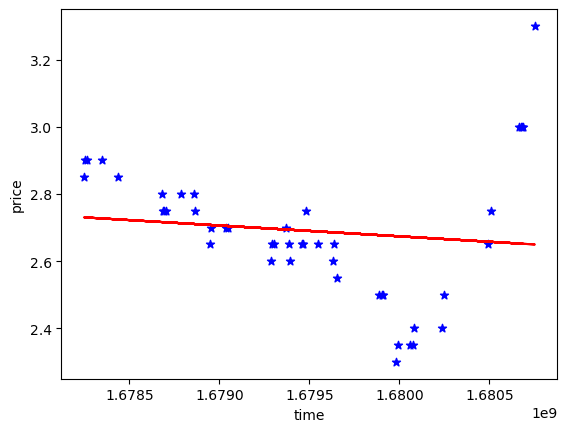

In [51]:
plt.scatter(X_train, y_train, color='blue', marker='*')
plt.plot(X_train, y_pred_train1, color='red')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

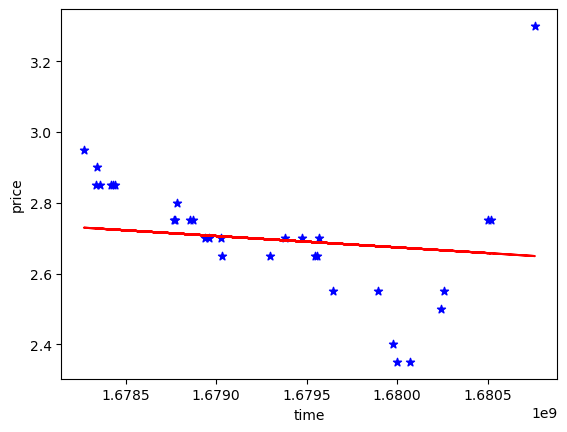

In [53]:
y_pred_test1 = lr.predict(X_test)
plt.scatter(X_test, y_test, color='blue', marker='*')
plt.plot(X_test, y_pred_test1, color='red')
plt.xlabel('time')
plt.ylabel('price')
plt.show()